<a href="https://colab.research.google.com/github/tarun1208/BasicML/blob/main/Blog_Post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

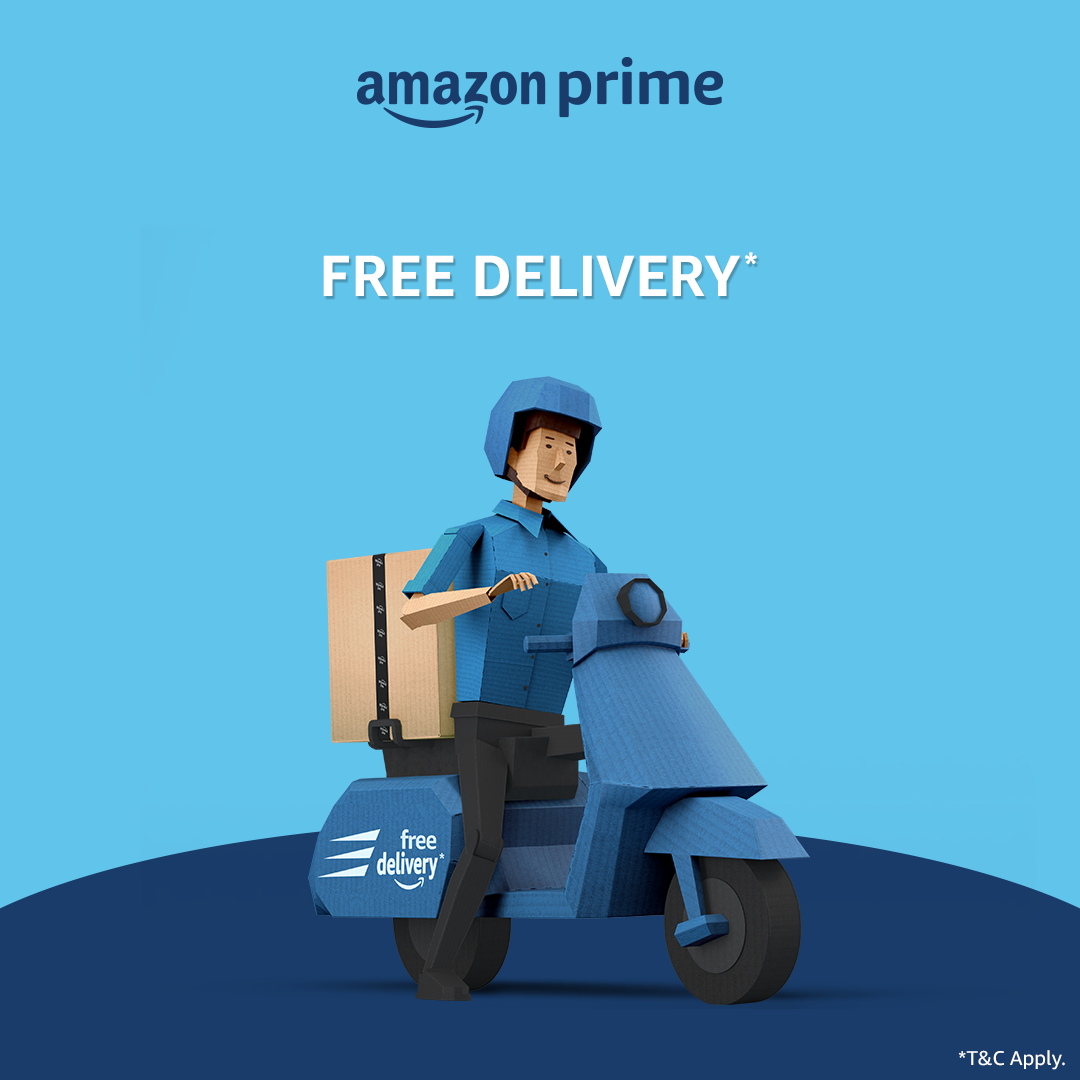

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
#Reading or loading data
df = pd.read_csv('/content/drive/MyDrive/amazon_delivery.csv')
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [6]:
df.dropna(inplace=True)

# Convert df types
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time']).dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time']).dt.time


In [7]:
# Create a new feature for distance
df['Distance'] = df.apply(lambda row: geodesic((row['Store_Latitude'], row['Store_Longitude']),
                                                   (row['Drop_Latitude'], row['Drop_Longitude'])).km, axis=1)

df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.488112
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,10.983242
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.648024
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.219668


In [8]:
# Extract day of the week and hour from Order_Date
df['Order_Day'] = df['Order_Date'].dt.dayofweek
df['Order_Hour'] = df['Order_Date'].dt.hour
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Day,Order_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737,5,0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737,4,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693,5,0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497,1,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.488112,3,0
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,10.983242,2,0
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.648024,4,0
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.219668,0,0


In [9]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Day,Order_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.020737,5,0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.143737,4,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.549693,5,0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.774497,1,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.197898,5,0


# Exploratory Data Analysis (EDA)

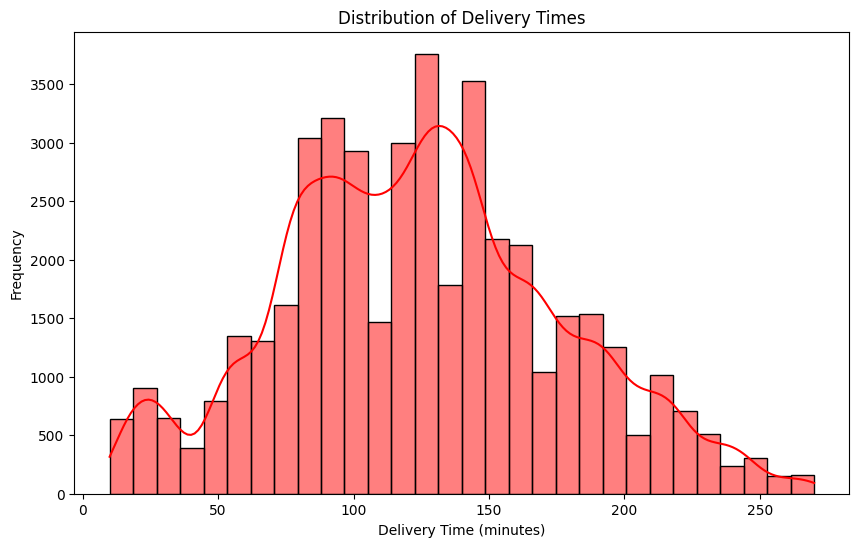

In [ ]:
#Distribution of Delivery Times
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True,color='red')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

*The Histogram represents the frequency of delivery times in minutes. It indicates that delivery times are weighted towards a specific range, with a central peak (mode) indicating the most common delivery times are (again) 100–150 minutes. The distribution is slightly right-skewed, with fewer deliveries exceeding 200 minutes. Overlayed on the histogram is the KDE (kernel density estimate) curve which gives some insight into the general pattern and spread of delivery times. It conveys the spread of the distribution, the central tendency, and the skew of the distribution.*

**Scatter Plot**

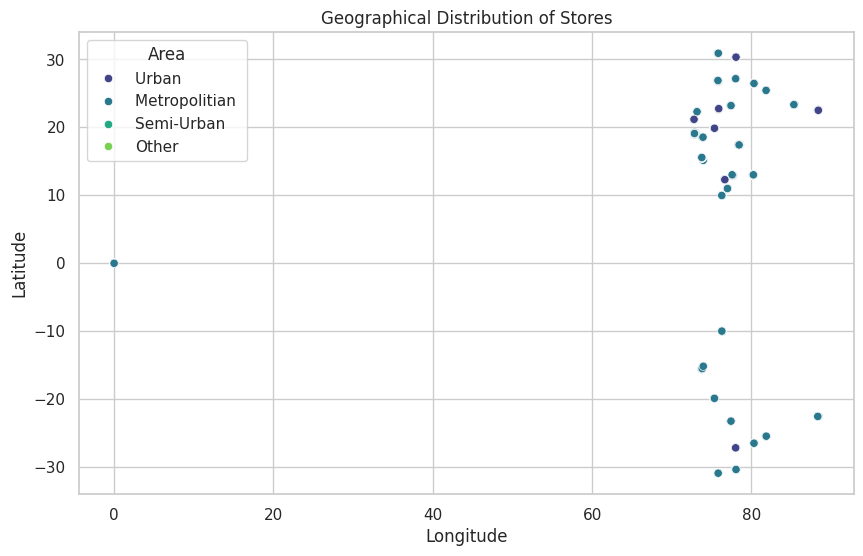

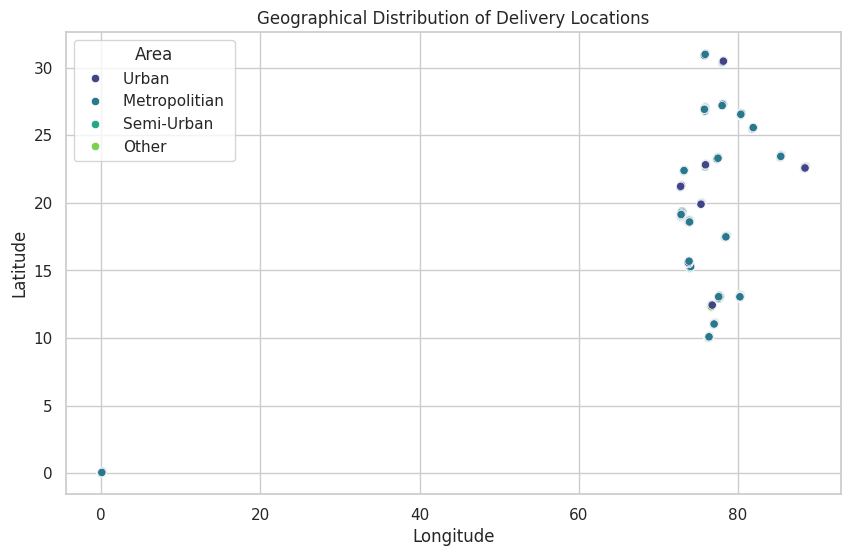

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Longitude', y='Store_Latitude', hue='Area', data=df, palette='viridis')
plt.title('Geographical Distribution of Stores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Drop_Longitude', y='Drop_Latitude', hue='Area', data=df, palette='viridis')
plt.title('Geographical Distribution of Delivery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Temporal Analysis**

Analyzing delivery times across different days of the week and hours of the day.

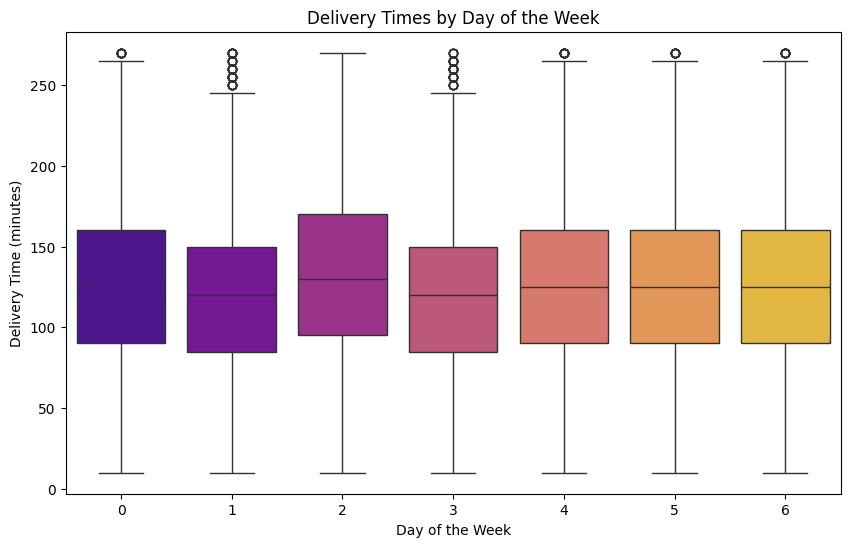

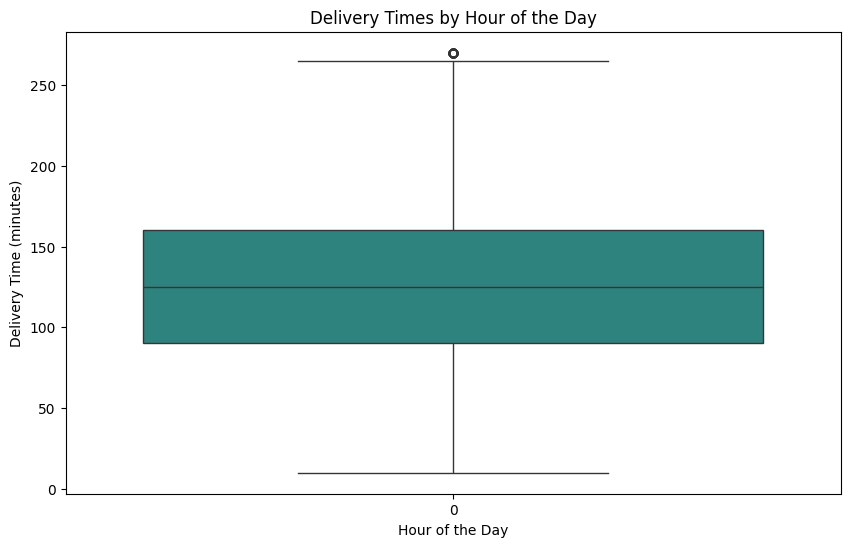

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Day', y='Delivery_Time',palette='plasma', data=df)
plt.title('Delivery Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Order_Hour', y='Delivery_Time', palette='viridis', data=df)
plt.title('Delivery Times by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

*The box plots show variation in delivery times for each day of the week (top) and each hour of the day (bottom). The median delivery time is fairly steady throughout the week as can be seen from the upper plot. However, the IQR also shows to be varying quite a bit, with some days sharing high values of variability and outliers. The lower plot shows delivery times, broken into hours of the day, with the distribution is much more narrow, with extreme outliers. This indicates that delivery times may be affected more by daily patterns or external factors in the form of traffic or demand at certain hours.*

**Impact of External Factors**

Examining the influence of weather and traffic conditions on delivery times.

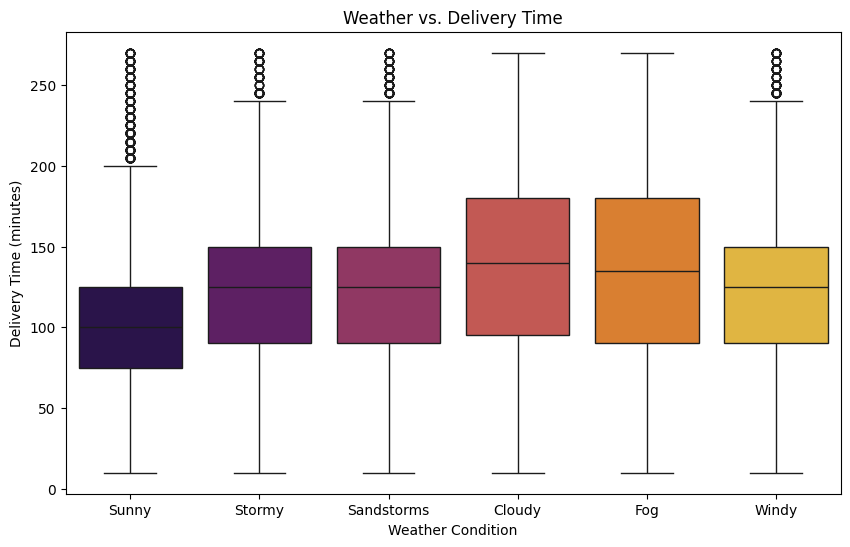

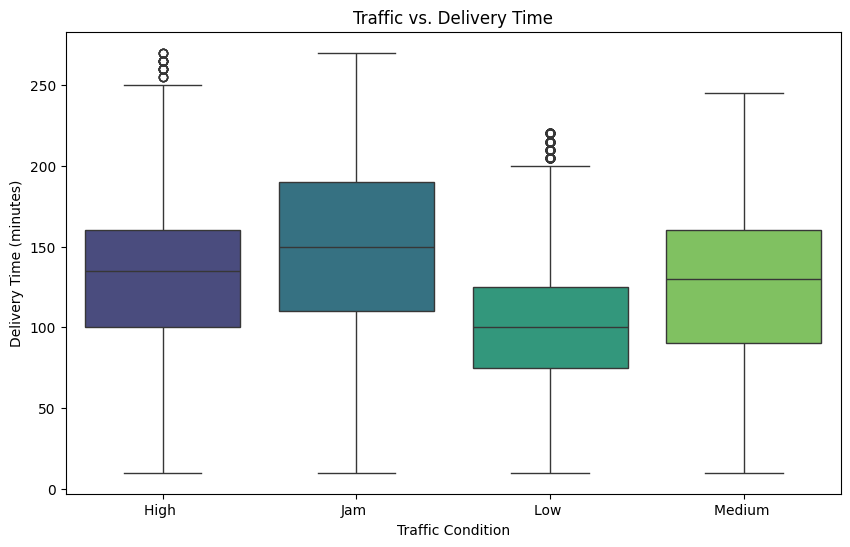

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time',palette='inferno', data=df)
plt.title('Weather vs. Delivery Time')
plt.xlabel('Weather Condition')
plt.ylabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Delivery_Time',palette='viridis', data=df)
plt.title('Traffic vs. Delivery Time')
plt.xlabel('Traffic Condition')
plt.ylabel('Delivery Time (minutes)')
plt.show()

*The graphs show how delivery times are affected by the weather and traffic levels. The first plot is average delivery times in described conditions — foggy and windy weather seem to correlate with a longer median delivery time in comparison to sunny or stormy weather. With increasingly adverse conditions, a widening variability (interquartile range) also is expressed implying a wider range in delivery durations. The bottom plot considers delivery times across traffic conditions, showing that high and medium traffic conditions lead to much longer delivery times than low traffic. The outcome reveals that daily weather patterns and traffic have played a highly impactful role within the delivery efficiency.*

# Correlation Heat Map

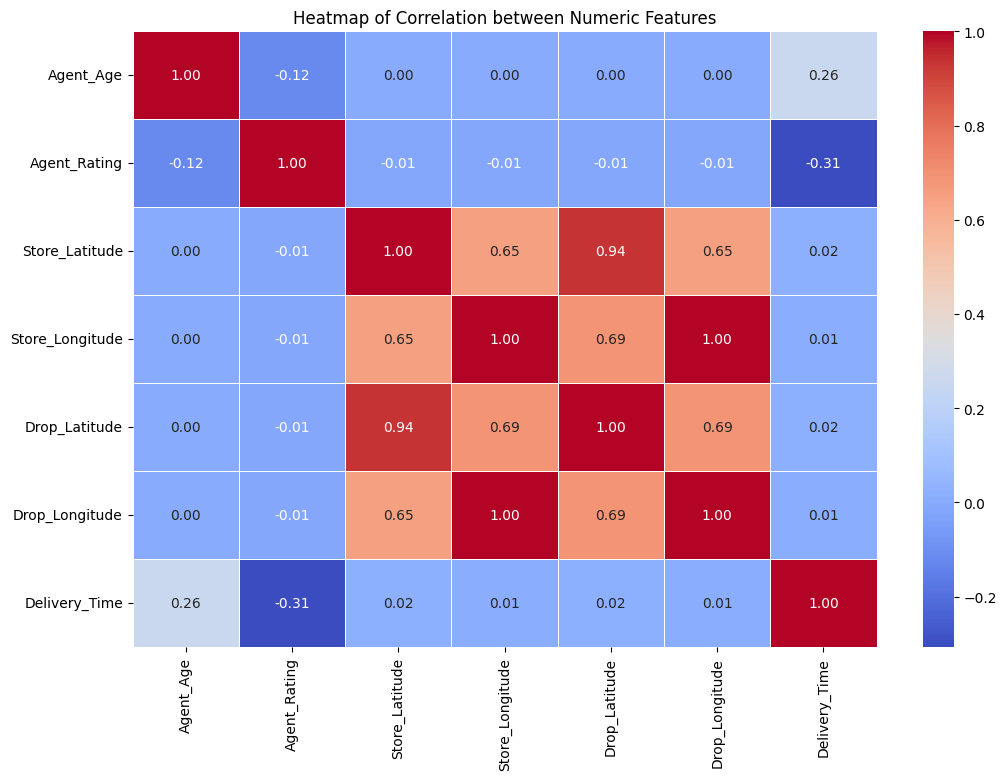

In [ ]:
numeric_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
                    'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation between Numeric Features')
plt.show()

*The heatmap shows the correlation between various numeric features. This means that features such as store latitude and longitude, drop latitude and longitude have strong positive correlations with one another and indicate the existence of proximity relationships. Age of agent is fairly weakly positively related to the length of a delivery, having an empirical correlation of 0.26. This could mean that older agents slightly tend to make longer deliveries. On the other hand, agent rating and delivery length have a weak negative correlation of -0.31. This could mean that agents with high ratings deliver the requested items in a shorter period. All in all, the heatmap provides a picture of which features interact and which one(s) may affect the delivery time.*

**Histogram**

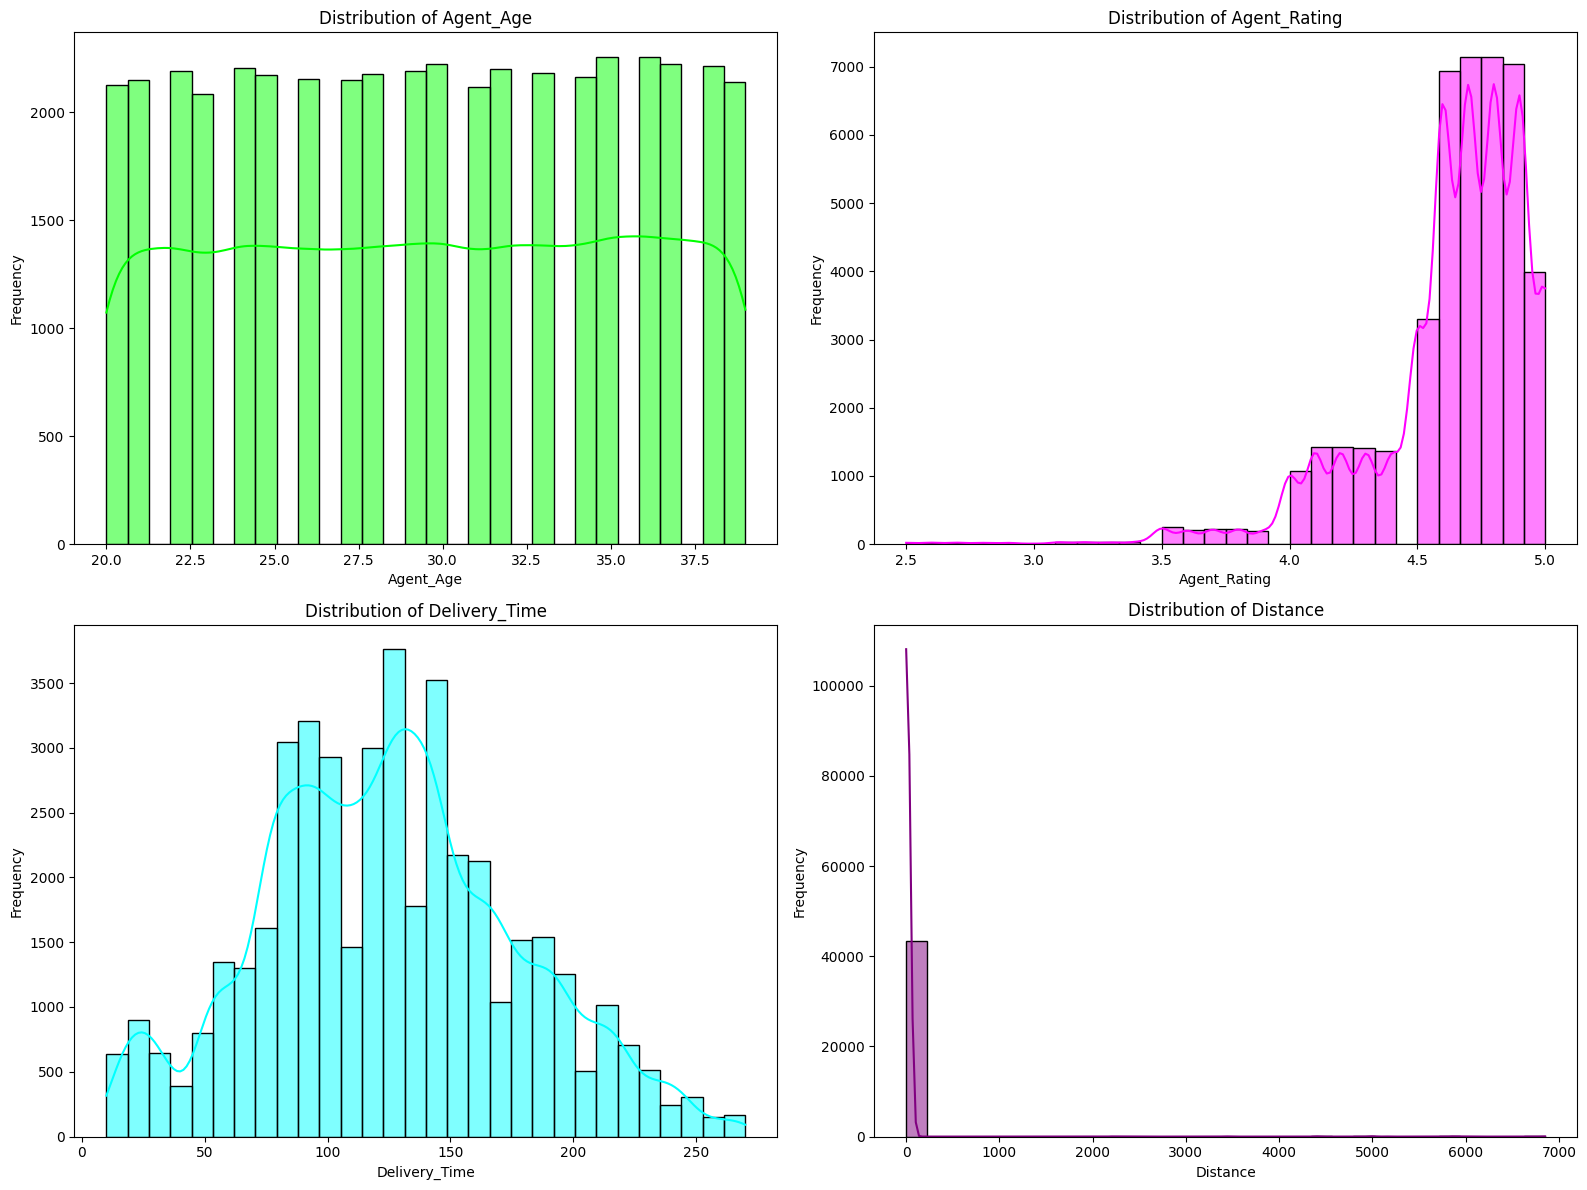

In [ ]:
features = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance']

#ploting histogram for each feature
plt.figure(figsize=(16, 12))
colors= ['lime', 'magenta', 'cyan', 'purple']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, color=colors[i-1],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

*Timelines helps us to see picture of distribution of different characteristics. It looks like the distribution of “Agent Age” is rather even which means that the agents are evenly spread through the age spectrum. For “Agent Rating”, the graph is mostly zero on the left side and the data points are concentrated on between 4.5 and 5. Which means that most of the agents are performing rather well. In terms of time it looks like most of the orders were delivered in a certain period of time, suggesting that there is a mode of the distribution. At the same time, while the distance distribution shows some spread. The spread is due to the distance to the delivery point. To sum up, these histograms allows to roughly understand the structure of data better.*

*The graphs illustrate the spread of intervals between order placements and dispatch. The most common mode for “Distribution of Delivery Time” is around the 100-150 minute range, which is somewhat of a peak and center of the distribution curve. This indicates that most of the deliveries take this duration. For longer intervals, the frequency decreases gradually which indicates that fewer deliveries take a longer time to be completed. With The “Distribution of Distance” nearly all deliveries are close range; that is, a strong majority of them are in a close distance, while only a small number are long distance. This shows that most orders are within or in close proximity of where they are ordered, with only few that need to be transported over good distances.*

**Line Plot**

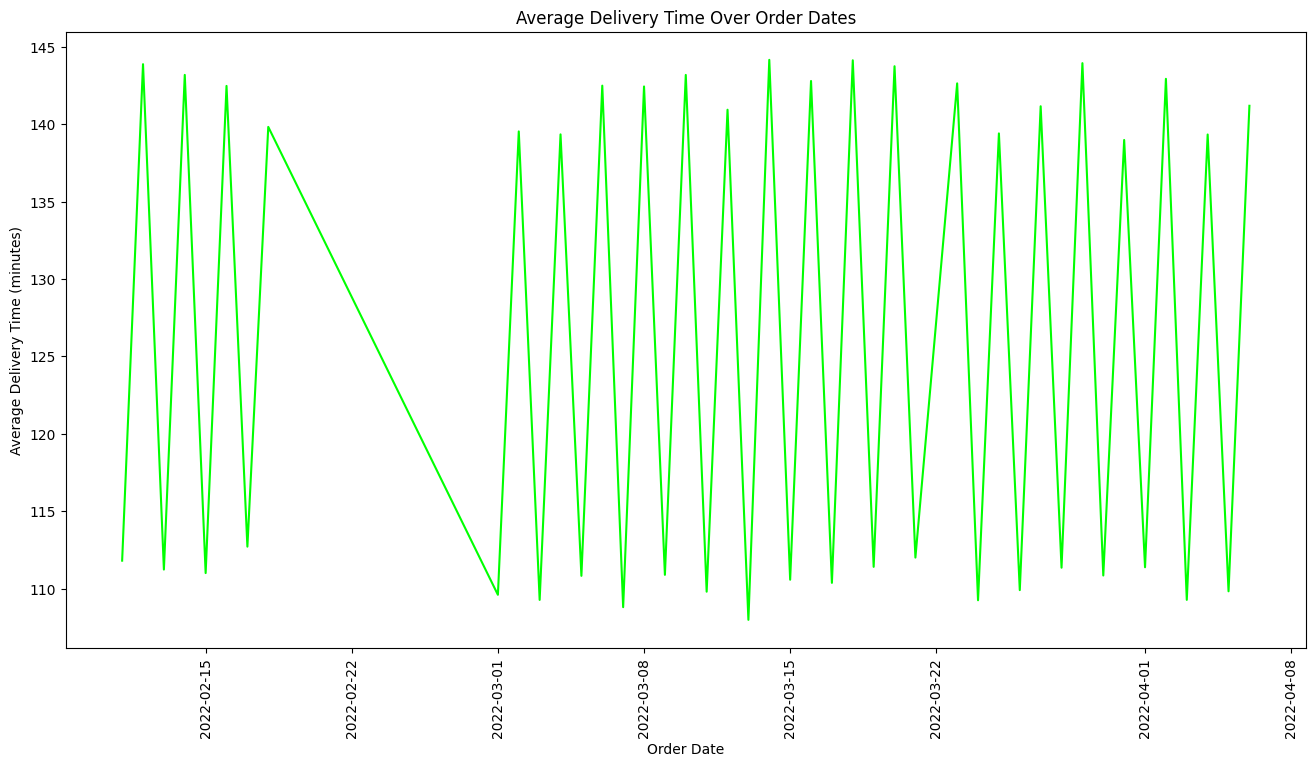

In [ ]:
daily_delivery_time = df.groupby('Order_Date')['Delivery_Time'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=daily_delivery_time, x='Order_Date', y='Delivery_Time',color='lime')
plt.title('Average Delivery Time Over Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)
plt.show()

*The graph depicts the change delivery time on the average for a set of order dates. It is possible that the data does present constant variations which would mean that delivery time was not the same for the given dates. There is no definite upward or downward movement and this means that the level of delivery was not uniform over the period in question. However, the cyclic pattern is present and could be attributed to the daily or weekly fluctuations in the demand, traffic or the level of operations affecting delivery times. This plot helps to understand the time factors together with the spatial relationships in respect of the functioning of the delivery process.*

**violinplot**

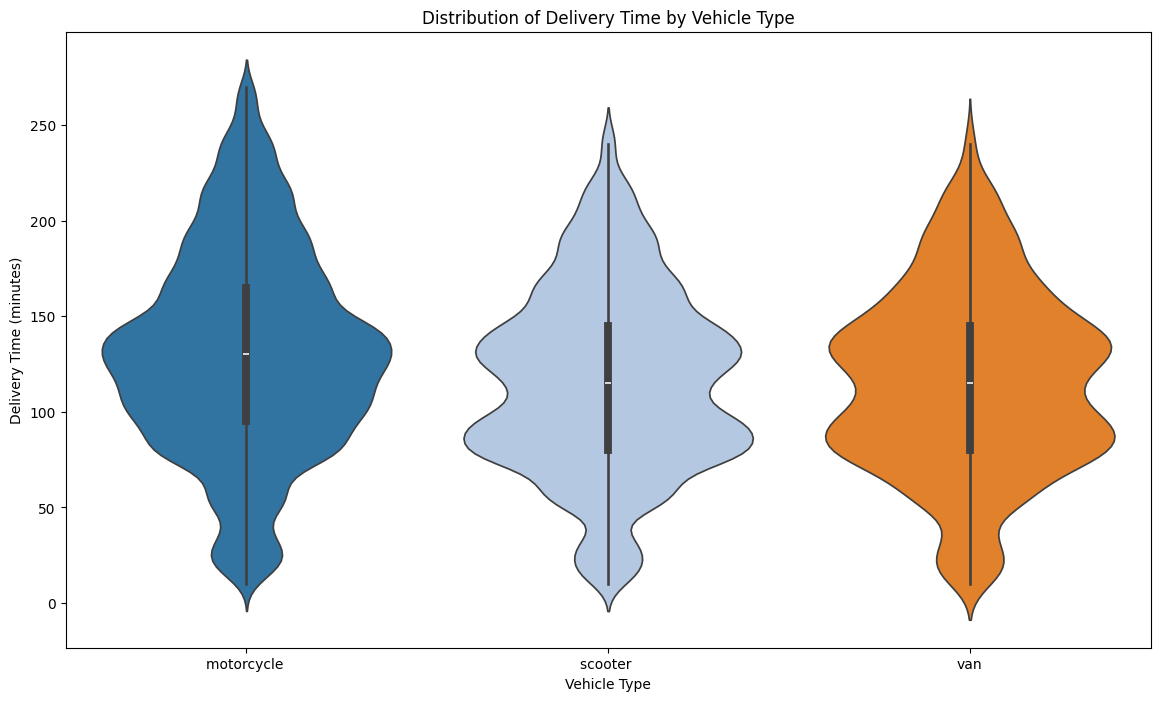

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Vehicle', y='Delivery_Time', palette='tab20')
plt.title('Distribution of Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (minutes)')
plt.show()

*This violin plot shows how delivery times differ among three types of vehicles: motorcycles, scooters, and vans. By looking at the shapes of the plots, we can see the range and typical delivery times for each vehicle. Motorcycles and scooters have similar shapes, with tighter distributions and lower median delivery times. This suggests that they are more reliable and better for quick or short deliveries. In contrast, vans have a broader range and a higher median delivery time, meaning their delivery times can vary more and take longer, likely because they are used for larger or longer deliveries.*


*The plot also points out that vans are more likely to have extreme delivery times, as indicated by the longer tails at the upper end of the range. This might be due to things like heavy traffic, longer routes, or larger loads. On the other hand, motorcycles and scooters have more consistent delivery times. Overall, the differences between these vehicles show that the type of vehicle used can really influence how efficiently deliveries are made, with motorcycles and scooters being ideal for speedy jobs and vans better for bigger or longer-distance tasks.*

**Donut plot**

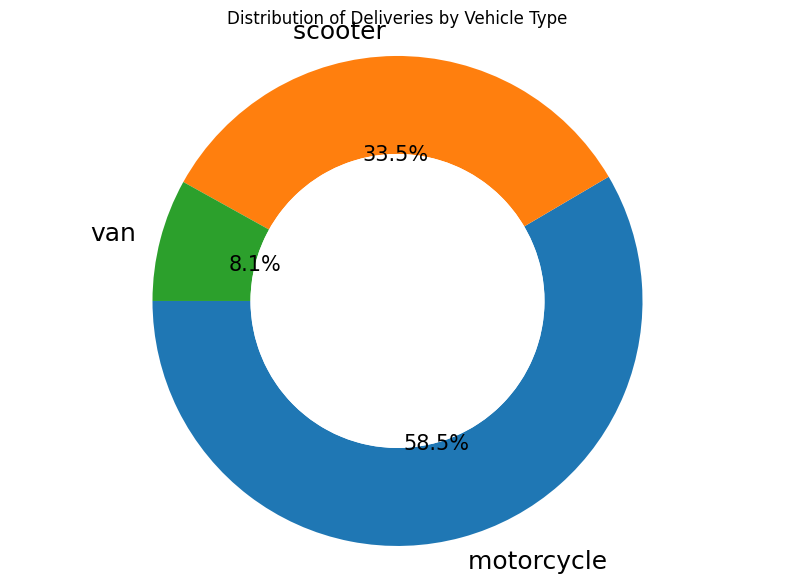

In [ ]:
plt.figure(figsize=(10, 7))
vehicle_counts = df['Vehicle'].value_counts()

#pie chart
wedges, texts, autotexts = plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%',
                                   startangle=180, wedgeprops=dict(width=0.4))


centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_fontsize(18)
for autotext in autotexts:
    autotext.set_fontsize(15)

plt.title('Distribution of Deliveries by Vehicle Type')
plt.axis('equal')
plt.show()


*This donut chart shows how deliveries are divided among different types of vehicles. Motorcycles take the lead, handling about 58.5% of deliveries, making them the most popular choice. Following behind are scooters, which are used for 33.5% of deliveries, ranking second. Vans have the smallest share at just 8%, indicating they are not used as much.*

*The fact that motorcycles and scooters are used more often suggests that they are preferred because they can easily navigate through busy areas and are more affordable. On the other hand, vans seem to be saved for special delivery needs, like carrying larger or heavier items, which might explain their smaller role in the overall picture. This breakdown shows that the choice of delivery vehicles depends on what is practical for the job*